In [25]:
# import class MergerRemnant
import Remnant
from Remnant import MergerRemnant

# import all modules needed 
import numpy as np
import astropy.units as u
from astropy.constants import G

# import plotting modules
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [26]:
t = np.linspace(0, 10, 11)
snaps = t * 0.7 /10 * 1000
snapnumbers = snaps.round().astype(int)
voversigma = np.zeros(np.size(snapnumbers))
print(t)
print(snaps)

# for i in range(0, len(snapnumbers), 1): 
#     print(i)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[  0.  70. 140. 210. 280. 350. 420. 490. 560. 630. 700.]


V/sigma:  2.2610806018030454
V/sigma:  2.266712943725523
V/sigma:  2.3897347589317577
V/sigma:  2.2112420480885913
V/sigma:  0.7424625395466513
V/sigma:  2.0946357890445637
V/sigma:  1.5676598458280098
V/sigma:  1.5498409199736622
V/sigma:  1.549637026986657
V/sigma:  1.5832928142217964
V/sigma:  1.6145606279135072


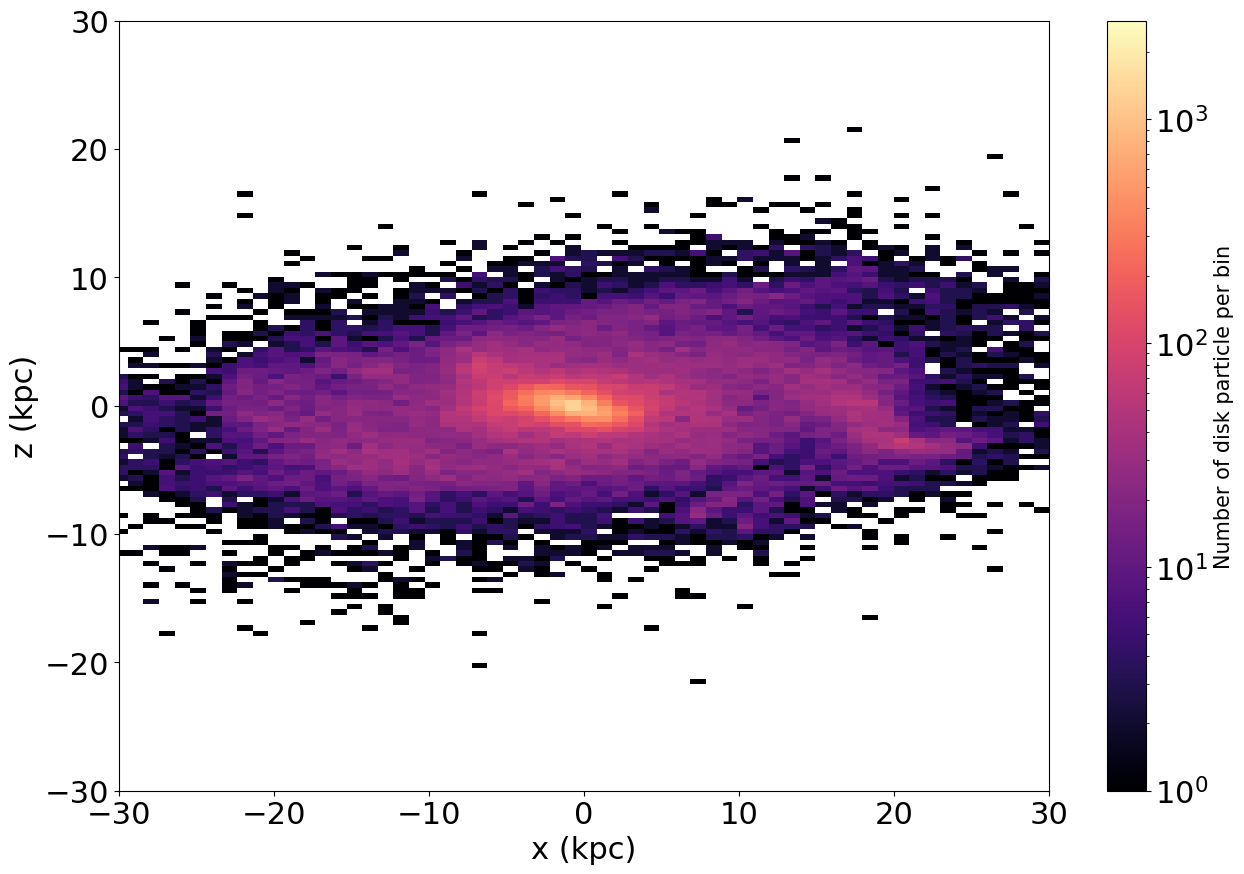

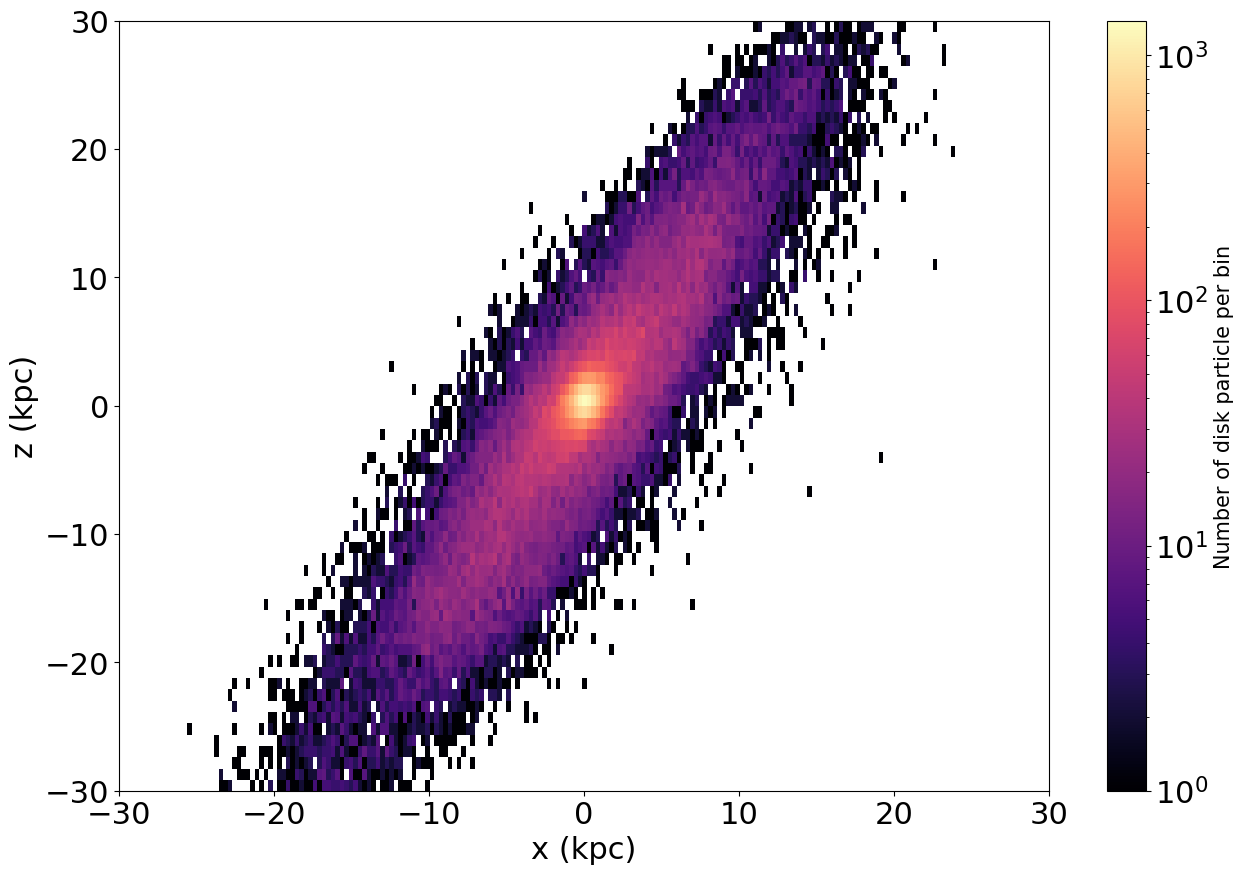

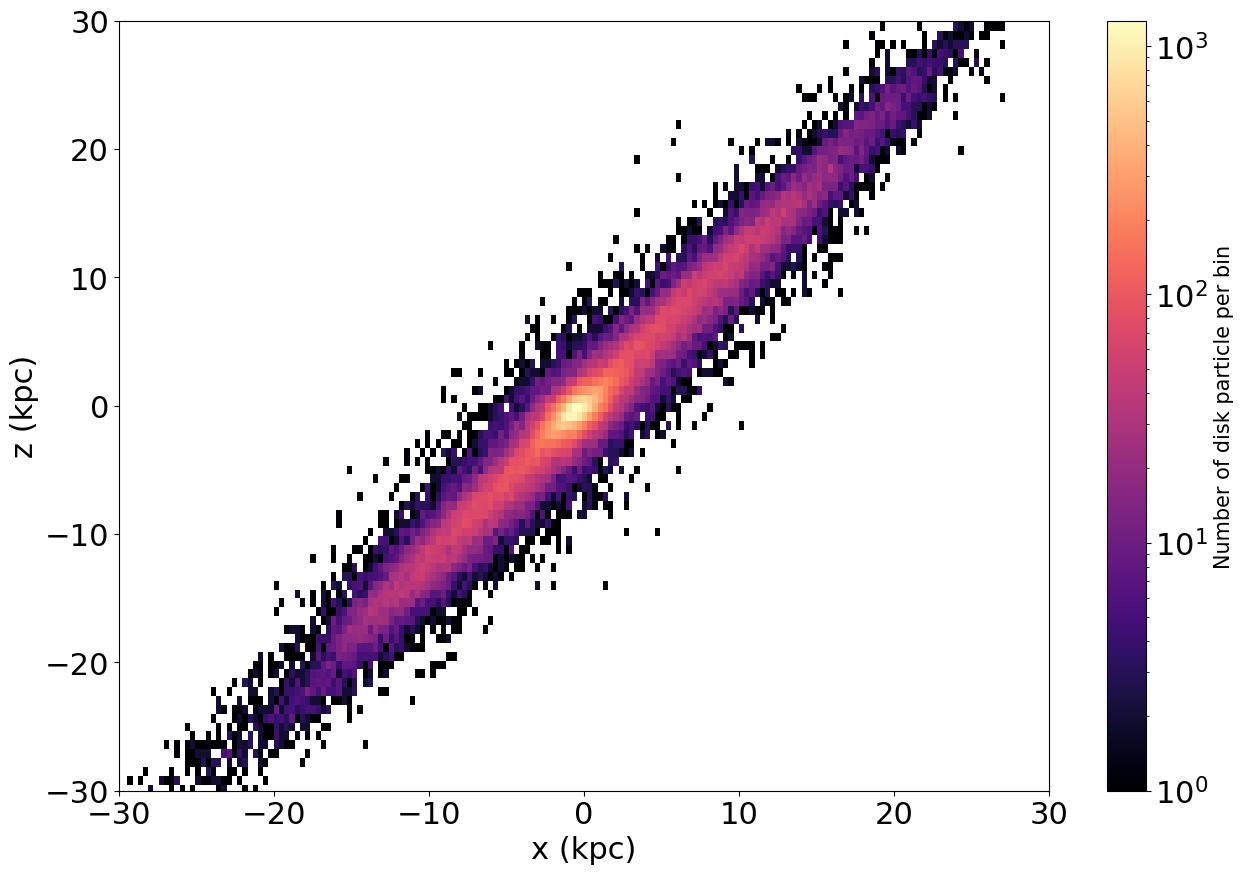

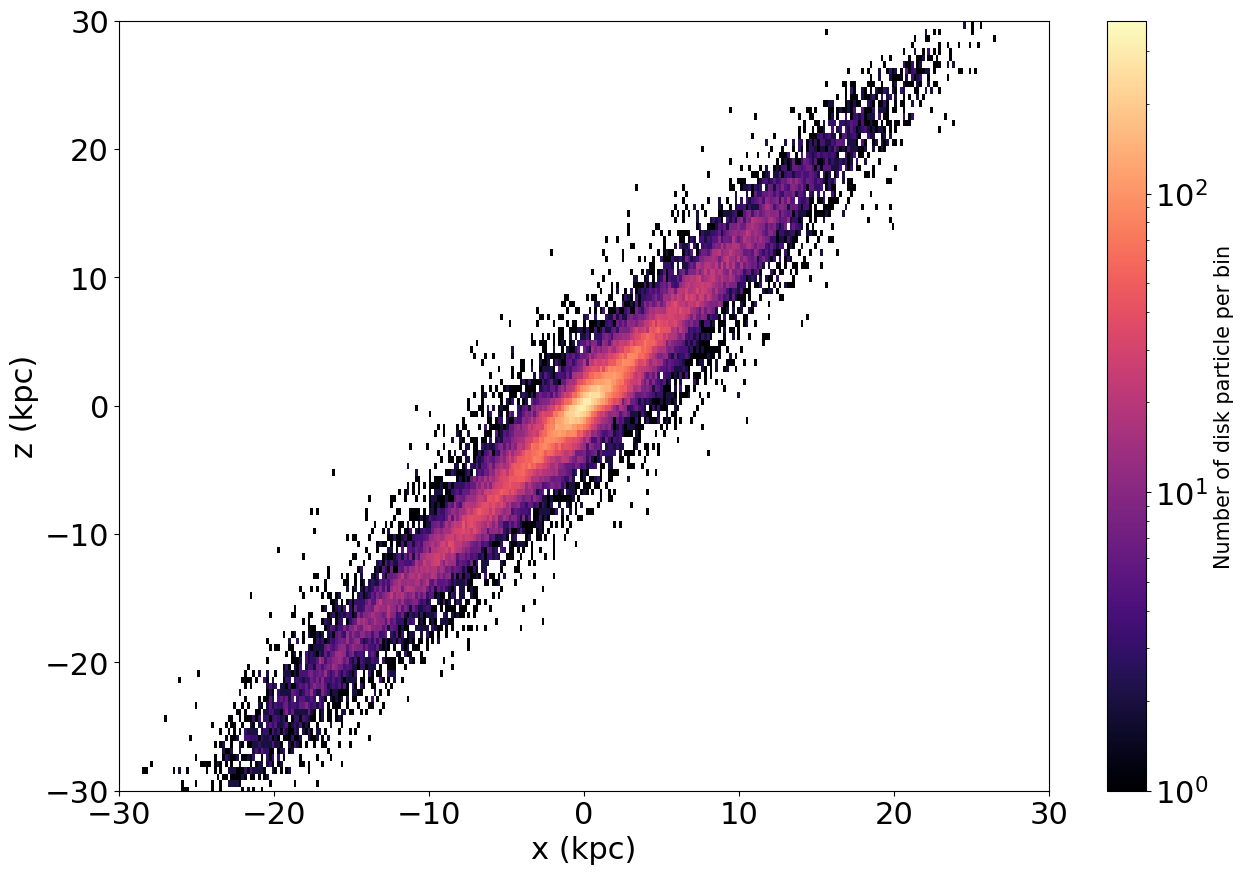

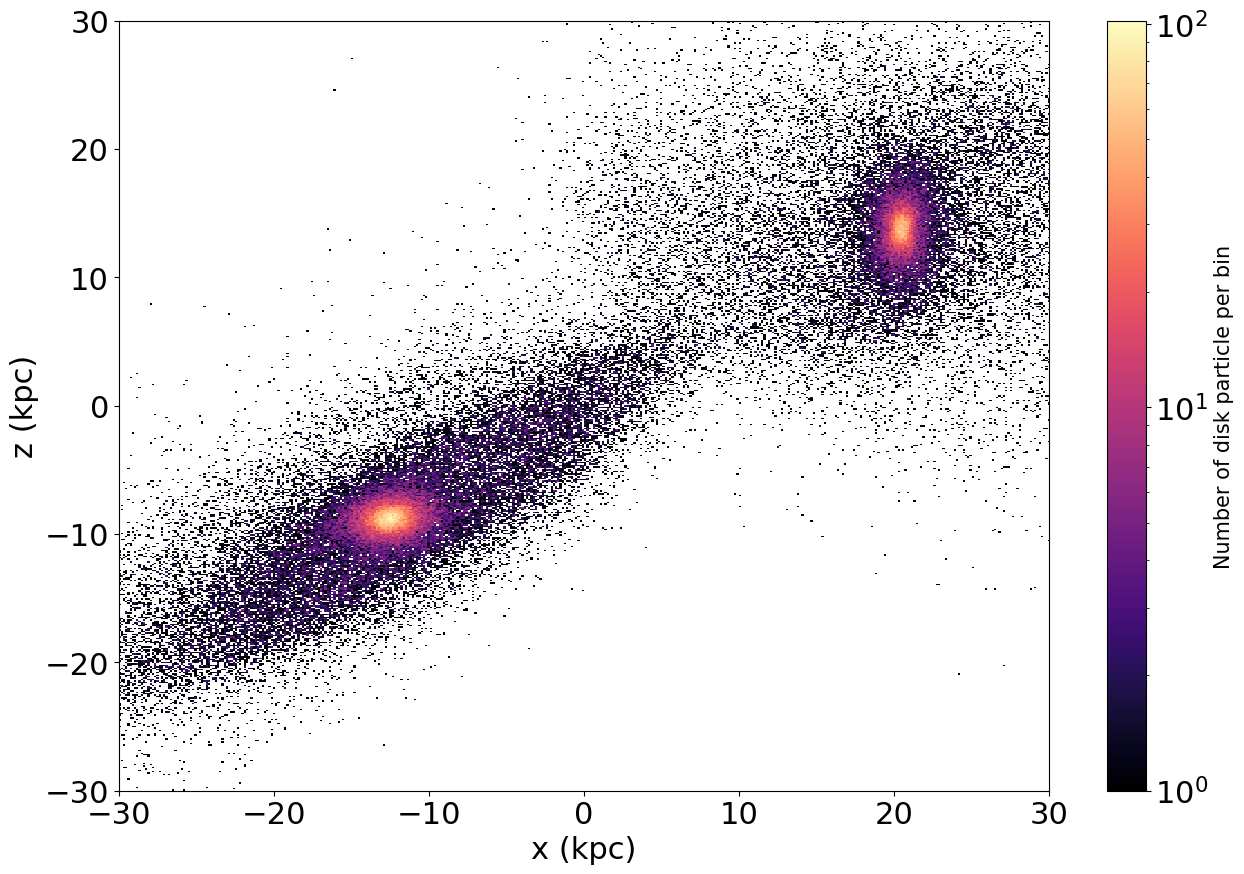

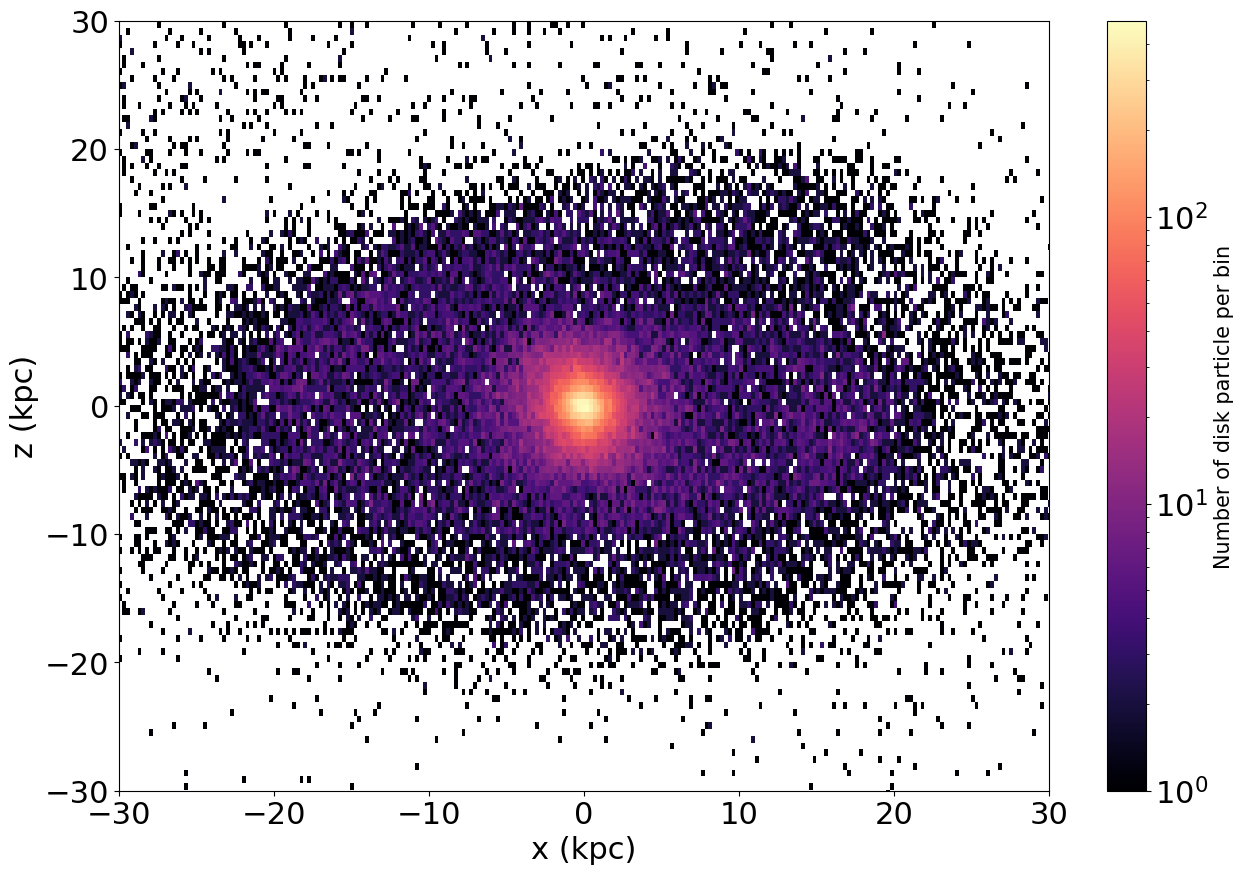

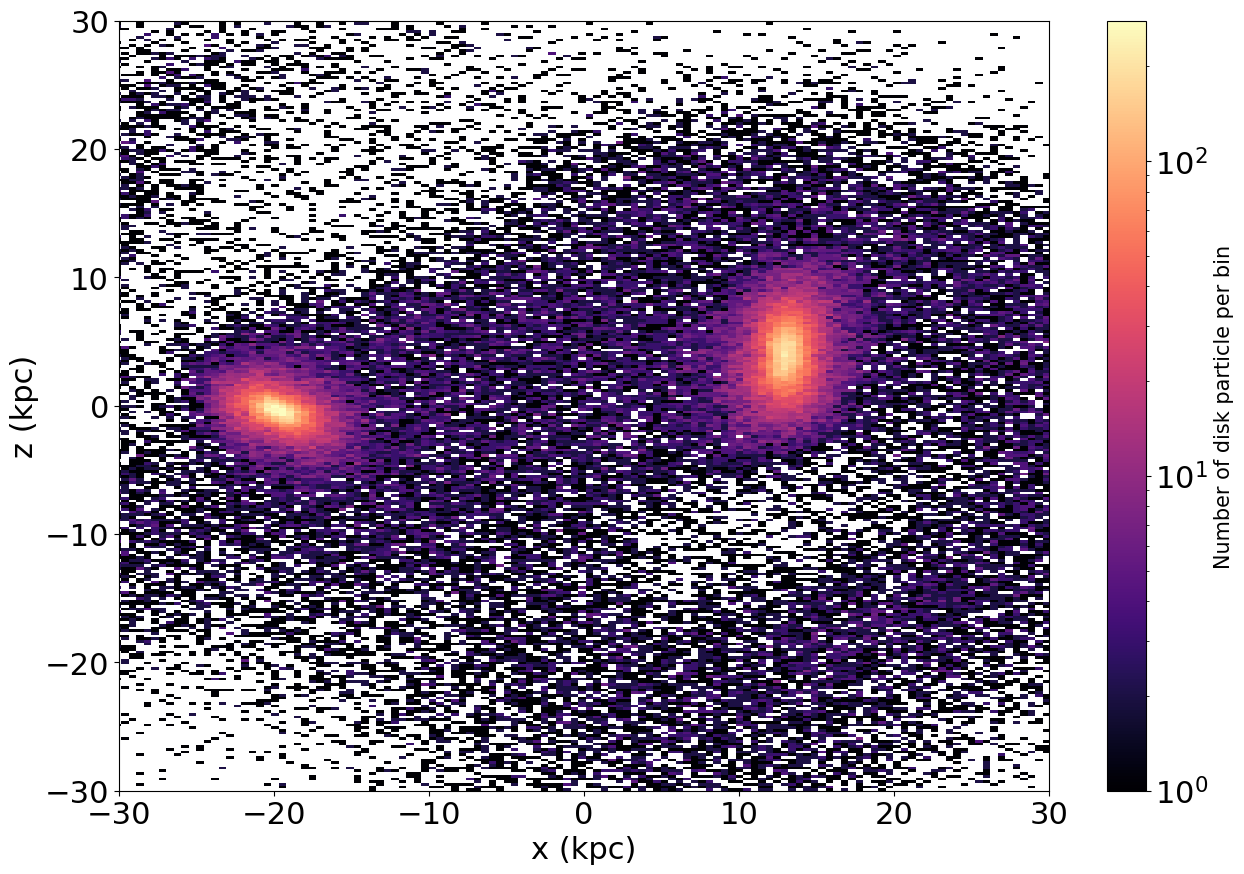

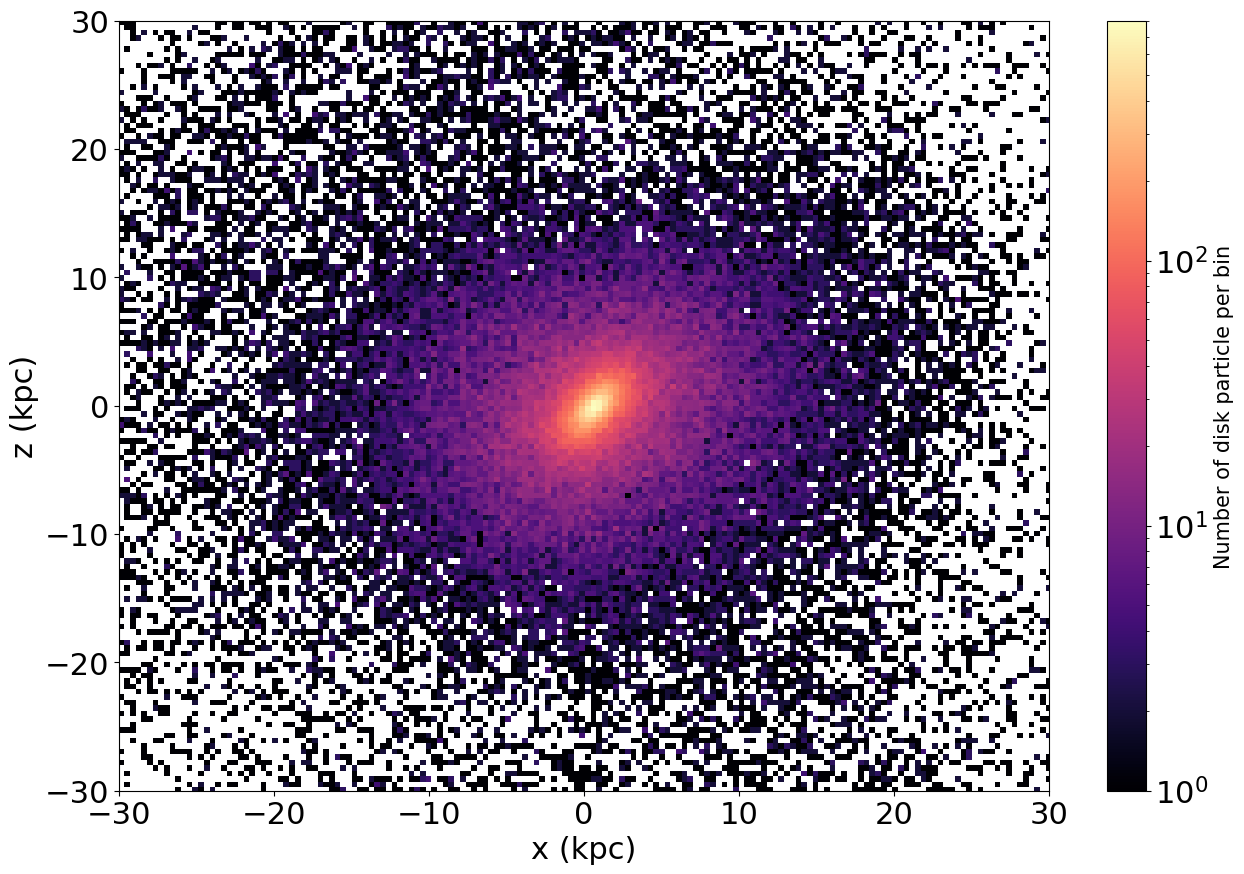

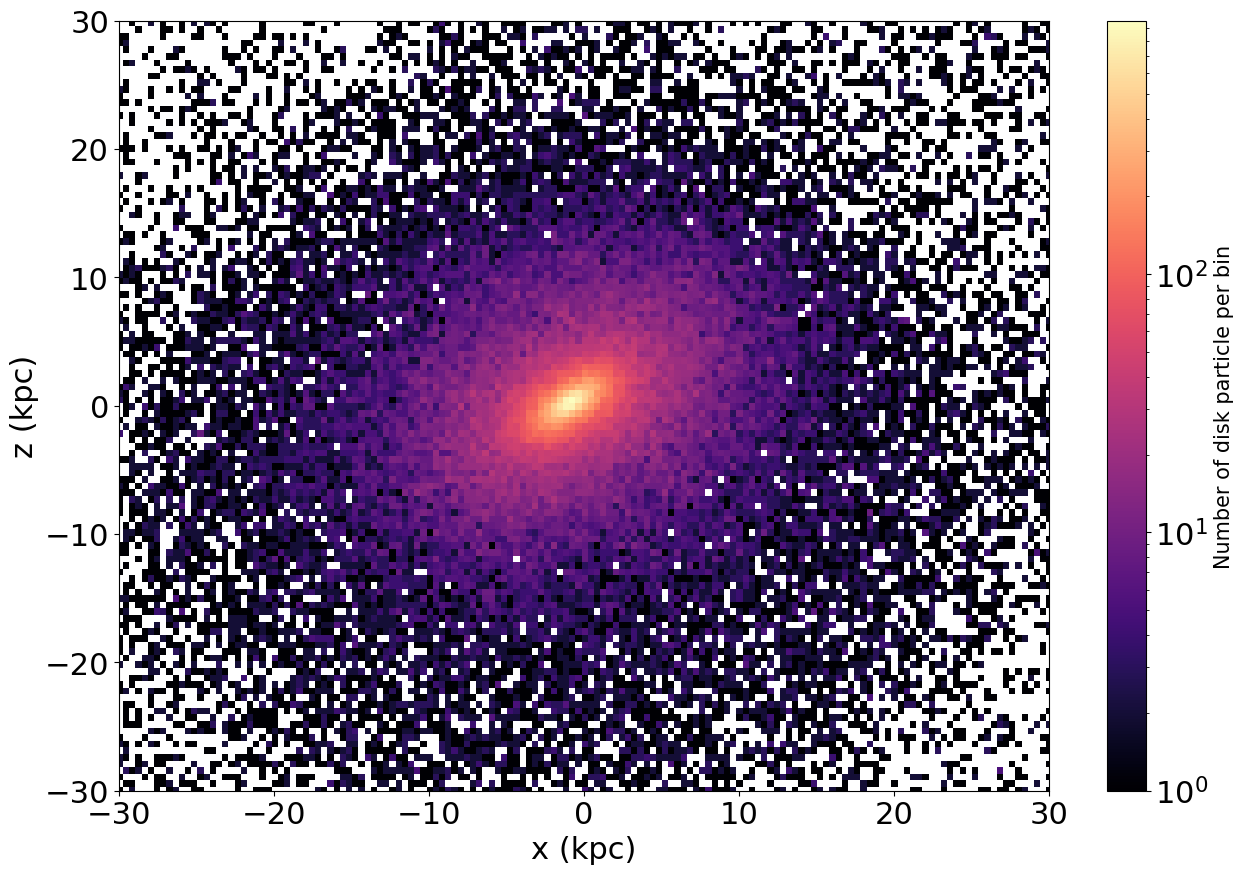

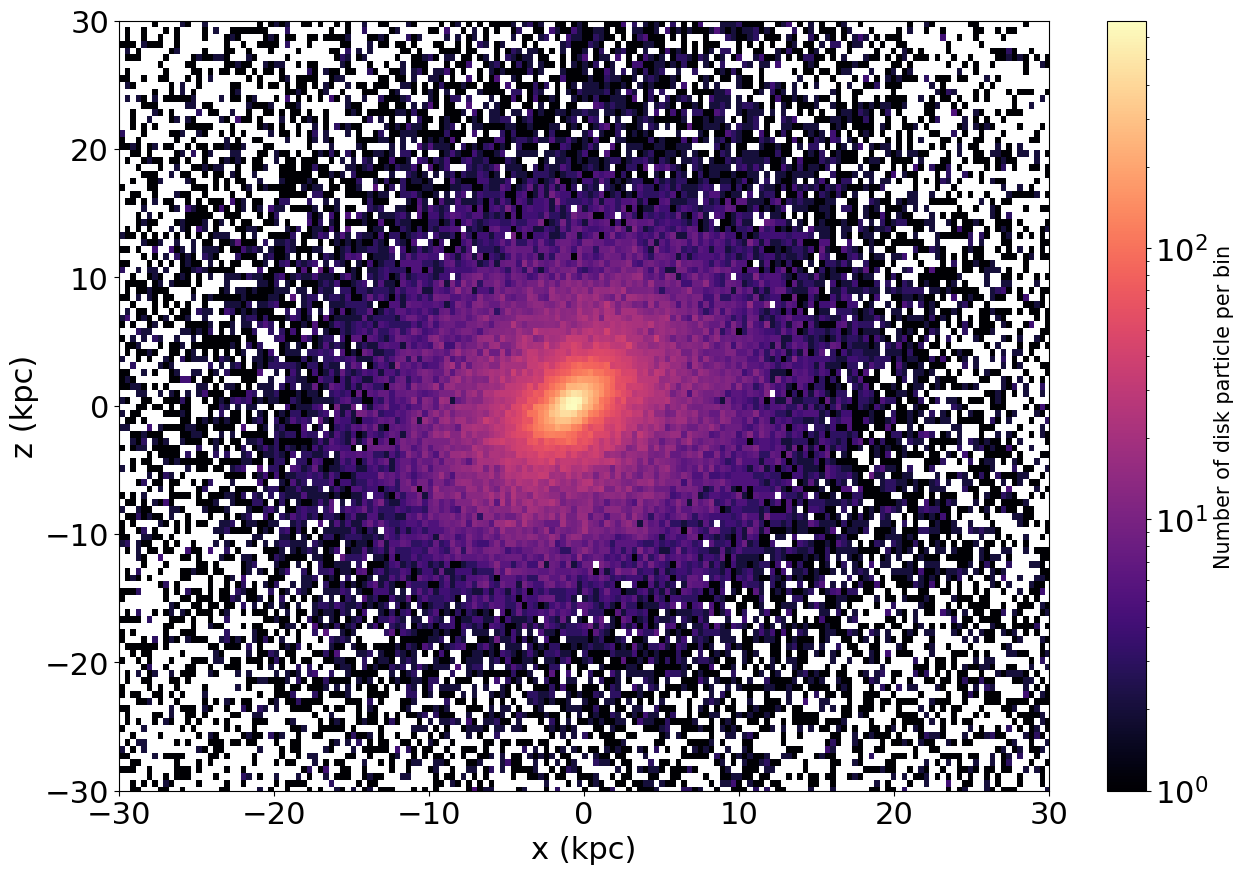

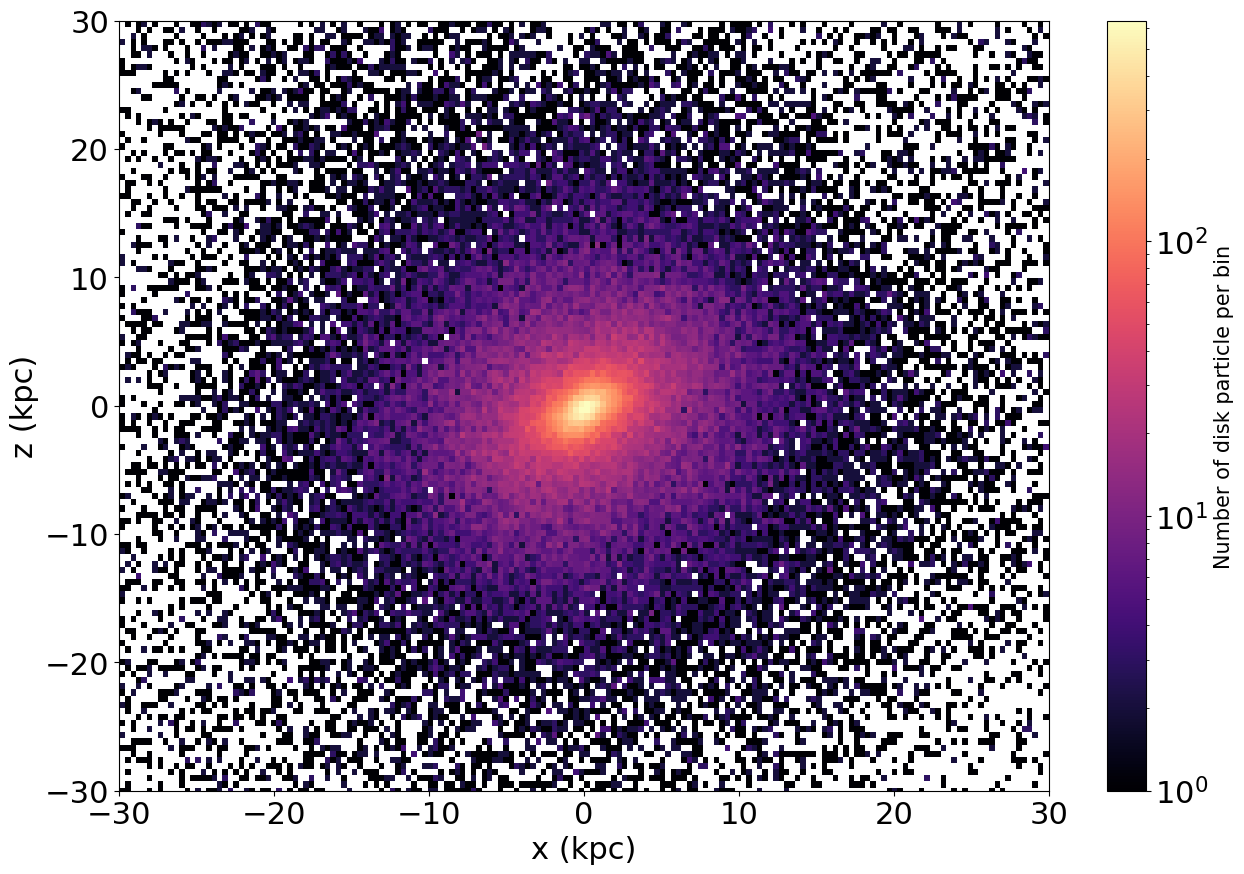

In [27]:
# make array of snapshot numbers 0-10 Gyrs by step 2 Gyrs
t = np.linspace(0, 10, 11)
snaps = t * 0.7 /10 * 1000
snapnumbers = snaps.round().astype(int)

voversigma = np.zeros(np.size(snapnumbers))

# create MergerRemenant object for each snapshots
for i in range(0, len(snapnumbers), 1): 
    MW_M31 = MergerRemnant("MW","M31", snapnumbers[i])
    MW_M31.RotateAxis()
    MW_M31.EdgeOnVIew()
    rr, Vcirc = MW_M31.V_circ()
    r2, v2, rho, vphi = MW_M31.V_Phi()
    # plotrotationcurve(rho, vphi, r2, v2, snapnumbers[i])
    voversigma[i] = MW_M31.Vmax_over_sigma(150, 40)
    print('V/sigma: ',  voversigma[i])


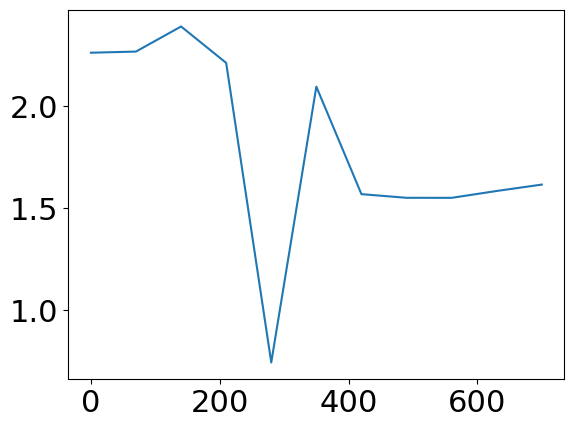

In [28]:
plt.plot(snapnumbers, voversigma)

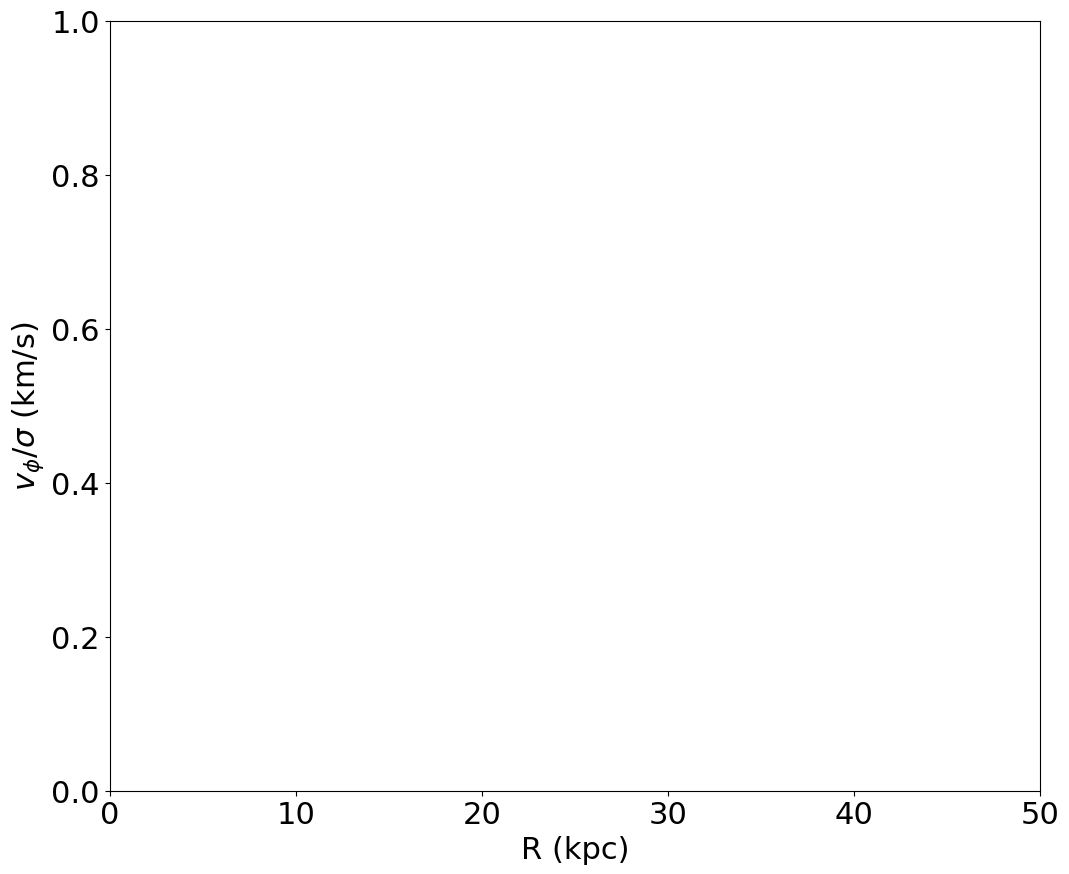

In [29]:
#  plot v/sigma vs time
fig = plt.figure(figsize=(12,10))
ax = plt.subplot(111)

# Add the circular velocity
plt.plot(snapnumbers, voversigma, color="red", label="Circular Velocity")
#plt.plot(-r, -Vcirc, color="red")

# Add axis labels
plt.xlabel('R (kpc)', fontsize=22)
plt.ylabel(r'$v_\phi / \sigma}$ (km/s)', fontsize=22)

#set axis limits
plt.ylim(0, 1)
plt.xlim(0, 50)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size


# Save file
plt.savefig('plot/Vprofile_timepng')